<IPython.core.display.Javascript object>


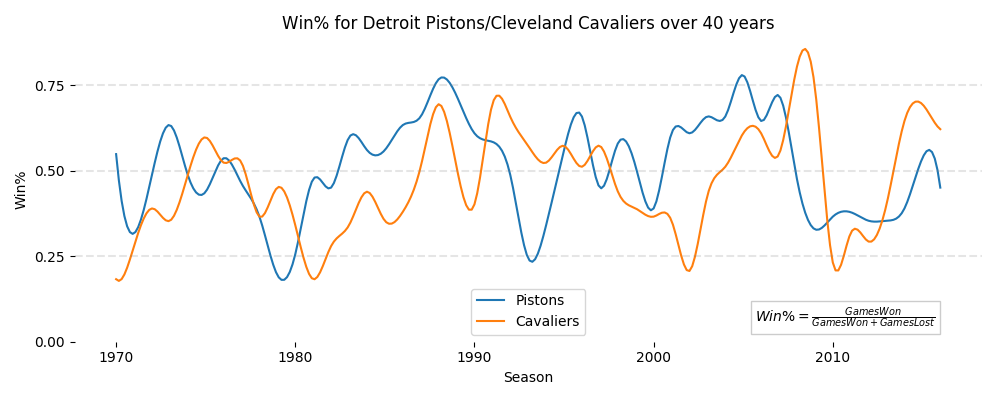

In [85]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wikipedia as wp
from scipy.interpolate import spline
 
#Get the data for Cleveland Cavaliers
html = wp.page("List of Cleveland Cavaliers seasons").html().encode("UTF-8")
df = pd.read_html(html)[1]
df.drop([1,2,3,4,5,9,10,11,12],axis=1,inplace = True)
df.to_csv('cc.csv',header=None, index=False)
df_cc = pd.read_csv('cc.csv')
df_cc.replace({'â': '-'}, regex=True,inplace = True)
# df_cc.set_index(['Season'],inplace = True)
df_cc['Seasons']=df_cc.Season.str[:4]
# df_cc

#Get the data for Detroit Pistons
html_dp = wp.page("List of Detroit Pistons seasons").html().encode("UTF-8")
df2 = pd.read_html(html_dp)[1]
df2.drop([1,2,3,4,5,9,10,11],axis=1,inplace = True)
df2.drop(df2.index[np.arange(1,25)],inplace = True)
df2.to_csv('dp.csv',header=None, index=False)
df_dp = pd.read_csv('dp.csv')
df_dp.replace({'â': '-'}, regex=True,inplace = True)
df_dp= df_dp.drop(df_dp.index[[47,48]])
df_dp['Seasons']=df_dp['NBA Season'].str[:4]
# df_dp.set_index(['Seasons'],inplace = True)
# print(df_dp)

#smoothing line graph for detroit piston
xnew = np.linspace(df_dp.index.min(),df_dp.index.max(),300)
ynew = spline(df_dp.index,df_dp['Win%'],xnew)

#smoothing line graph for cleveland cavaliers
xnew_cc = np.linspace(df_cc.index.min(),df_cc.index.max(),300)
ynew_cc = spline(df_cc.index,df_cc['Win%'],xnew_cc)

# ploting 
plt.figure(figsize=(10,4), facecolor='white')
# plt.plot(df_dp.index, df_dp['Win%'], label='Pistons')
plt.plot(xnew, ynew, label='Pistons')
# plt.plot(df_cc.index, df_cc['Win%'], label='Cavaliers')
plt.plot(xnew_cc, ynew_cc, label='Cavaliers')
ax = plt.gca()

# beautifying the graph
ax.axhline(y=.75, alpha=0.2,ls ='--',c='grey')
ax.axhline(y=.25, alpha=0.2,ls ='--',c='grey')
ax.axhline(y=.5, alpha=0.2,ls ='--',c='grey')
x = ax.xaxis
plt.xlabel('Season')
plt.yticks(np.arange(0, 1, .25))
plt.ylabel('Win%')
plt.title('Win% for Detroit Pistons/Cleveland Cavaliers over 40 years')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.legend(loc=8)
plt.tight_layout()
text = r'$Win\% = \frac{Games Won}{Games Won + Games Lost}$'
ax.text(0.75,0.04,text, verticalalignment='bottom',
                     horizontalalignment='left',
                     fontsize=10,
                     bbox={'facecolor':'white', 'alpha':0.2, 'pad':3},
                     transform=ax.transAxes)
ticks = ax.get_xticks()
years = ['1960','1970','1980','1990','2000','2010']
ax.set_xticklabels(years)
plt.show()



